# **Algorithmie**

**Un algorithme**: est une suite finie d’opérations ou d'instructions permettant de résoudre un problème donné.

- Une partie importante de la programmation consiste à savoir écrire un problème en langage informatique. Pour cela il faut comprendre comment l'écrire avec les outils comme **les listes**, **les boucles** etc.

- Le tri est un **premier algorithme simple** ou on a traduit un problème: **le tri d'une liste** en un programme utilisant des instructions comme : **if**, **boucles** etc.

**Complexité**: notion permetant d'évaluer l'efficacité d'un algo en fonction de la taille du problème $n$.

- complexité moyenne du tri précédent: $O(n^2)$
- complexité moyenne du tri "sort": $O(n \operatorname{log} n)$
- complexité moyenne du tri "fusion": $O(n \operatorname{log} n)$

Sur un tableau de taille 1000: on aurait un nombre moyen d'opération autour de 3000 pour les 2 algorithmes "sort" et "fusion" contre 1 million pour mon algorithme.

**Important**: Faire des algorithmes au maximum pour s'entrainer.

Exemples issues du traitement des données.

# **Exemples**

# Régression linéaire

On chercher a estimer une fonction $y=f(x)$ connaissant un certain nombre de points: 
$$
(x_i,y_i) \quad \forall i\in \left\{1,n\right\}
$$

L'idée est de supposer que $y \approx \alpha x + \beta $.

Dans ce cas la solution est donnée par:
$$
\alpha  = \frac{\frac{1}{n}\sum_i^n(x_i-\bar{x})(y_i-\bar{y})}{\frac{1}{n}\sum_i^n(x_i-\bar{x})^2}
$$

avec $\beta= \bar{y} -\alpha \bar{x}$ et $\bar{x}=\frac{1}{n}\sum_i^nx_i$ la moyenne.

In [4]:
import numpy as np
def f1(x):
  return -x+2.0

def f2(x):
  return 2.0*x*x-4.0*x+2.0

def data_generation(f,a,b,n):
  h = (b-a)/n
  xi = np.linspace(a,b,n)
  yi = f(xi)
  return xi,yi

La fonction "data_generation" renvoit deux tableaux contenant les n $(x_i,y_i)$ uniformément construits associés une fonction $f$ sur $[a,b]$.

On peut générer la suite des points $x_i$ avec **linspace(a,b,n)** qui renvoit $n$ points uniformément répartie entre "a" et "b".

**Remarque importante**: on peut passer une fonction en paramètre d'une autre fonction.

In [5]:
def regression(x,y):
  xm = np.sum(x)/x.size
  ym = np.mean(y)
  varxy = np.sum((x-xm*np.ones(x.size))*(y-ym*np.ones(y.size)))
  varx2 = np.sum((x-xm*np.ones(x.size))*(x-xm*np.ones(x.size)))

  alpha = varxy/varx2
  beta = ym-alpha*xm
  return alpha, beta

Au-dessus, on propose une fonction pour calculer ces paramètres de régression.

On utilise des outils des "array" de numpy:
- **sum** qui somme les éléments du tableau
- **size** qui donne la taille du tableau
- **mean** qui en calcul la moyenne (sum + division par "size")

Ensuite on calcule les variances. **ones** crée un tableau de 1 et donc multiplié par $x_m$ on obtient un tableau de $x_m$.

On fait donc ensuite la somme d'un tableau ou chaque élément c'est $x_i-x_m$.

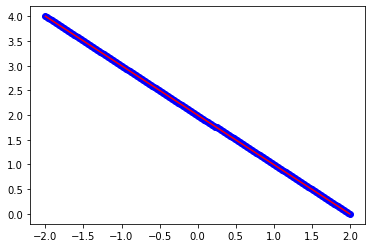

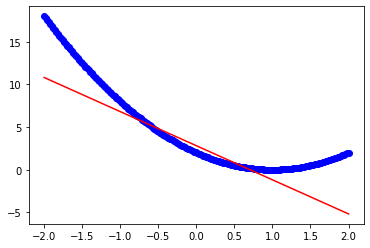

In [6]:
import matplotlib.pyplot as plt


x1,y1 = data_generation(f1,0.0,1.0,10)
a1,b1 = regression(x1,y1)
reg1 = lambda x: a1*x+b1

x2,y2 = data_generation(f2,-1.0,1.0,10)
a2,b2 = regression(x2,y2)
reg2 = lambda x: a2*x+b2

xref = np.linspace(-2.0,2.0,200)
yref1 = f1(xref)
yreg1 = reg1(xref)

yref2 = f2(xref)
yreg2 = reg2(xref)

plt.plot(xref, yref1, 'bo-',xref, yreg1, "r")
plt.show()
plt.plot(xref, yref2, 'bo-',xref, yreg2, "r")
plt.show()

En définissant **2 fonctions** sur la génération des données et régression on peut faire 2 exemples en seulement 4 lignes. Cela évite de réécrire du code.

On utilise ici les **lambda fonctions** cela permet de créé **à la volée** une fonction jetable qui ici a l'aide des paramètres $\alpha$ et $\beta$ nous donne le modèle de régression approché.

Ce type de fonction **doit** s'écrire sur une ligne avec une instruction.

En évaluant ces modèles sur une série de points on test l'efficacité de la méthode.



# Algorithme des K-moyennes

# Perceptron et Gradient